In [3]:
# !lscpu

In [1]:
import os
import numpy as np
os.cpu_count()

64

In [16]:
import torch.multiprocessing as mp
mp.cpu_count()

64

## dataset

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/winequality-white.csv', sep=';')
print(df.shape)
print(df['quality'].value_counts())
df.head()

(4898, 12)
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## sklearn machine learning models

- Machine Learning algo like Random Forest
- RepeatedStratifiedKFold
- cross val score
- n_jobs: Specify the number of cores to use for key machine learning tasks.

In [7]:
from time import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score??

### single core

In [8]:
## CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
t0 = time()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
print(time() - t0)

11.497193336486816


- n_splits=5, 数据集会分为 5 份，一份作为测试集，其余4分作为训练集；5种训练-测试所用数据集；
- n_repeats=3，这样的切分过程会重复3次；
- 一共会有 `5*3 == 15` 次独立的训练和测试过程

### cores

In [9]:
## CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
t0 = time()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=2)
print(time() - t0)

6.488362073898315


In [10]:
## CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
t0 = time()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
print(time() - t0, len(n_scores))

3.832430362701416 15


### all cores

In [11]:
## CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
t0 = time()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print(time() - t0, len(n_scores))

2.4879467487335205 15


In [12]:
# np.arange(1, 12, step=2)

In [14]:
all_jobs = os.cpu_count()
xs, ys = [], []
for i in np.arange(1, all_jobs, step=5):
        
    # train model
#     model = RandomForestClassifier(n_estimators=500, n_jobs=i)
#     # fit the model
#     model.fit(X, y)
    
    ## CPU cores we use n_jobs
    model = RandomForestClassifier(n_estimators=100)
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
    t0 = time()
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=i)

    xs.append(i)
    ys.append(time()-t0)

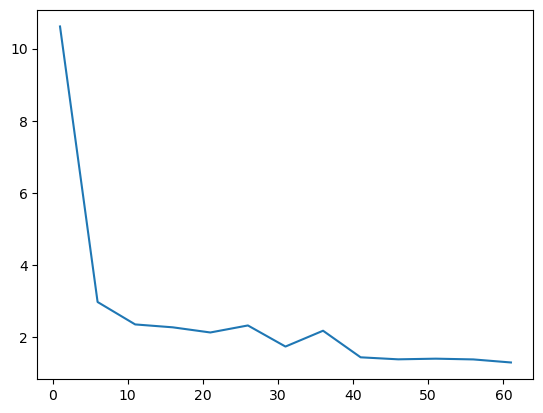

In [15]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)